출처  
- https://joyfuls.tistory.com/66  
- https://leebaro.tistory.com/entry/SVD%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0  
- https://seing.tistory.com/67  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from surprise import SVD, accuracy
from surprise import Reader, Dataset

**대표적인 차원 축소 알고리즘**  
1. PCA (Principal Component analysis, 주성분 분석)  
2. SVD (Singular Value Decomposition, 특이값 분해)  
3. NMF (Non-negative Matrix Factorization, 비음수 행렬 인수분해)  

**Matrix Factorizagion**  
- Matrix Factorization은 추천 시스템에서 주로 사용되는데, $m$명의 사용자와 $n$개의 아이템이 있고, 이를 $m \times n$ 형태의 벡터 $R$로 나타냈을 때 오차 함수를 최소화하는 $k$ 요인 벡터를 찾는 것  
  
    $$R \approx PQ^T$$  
  
    $R$ : $m$명의 사용자들의 $n$개의 아이템에 대한 평점 행렬  
    $P$ : $m$명의 사용자와 $k$ 요인에 대한 관계 행렬  
    $Q$ : $n$개의 아이템과 $k$ 요인에 대한 관계 행렬

**S V D**  
- matrix factorization 문제를 푸는 방법 중 하나이다.  
- $R$이라는 $m \times n$ 행렬을 아래 그림과 같이 $U$, $\sum$, $V^T$ 라는 3개의 행렬로 분해한다.  

![SVD구조](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FxhpHP%2FbtqzRN6RzG4%2FwuwBBbmp7ZRaeiRuue3gMK%2Fimg.png)

영화평점행렬($R$)을 SVD를 이용하여 사용자행렬($U$), 특성행렬($\sum$), 영화행렬($V^T$)로 만들어서 추천 데이터 생성에 필요한 데이터를 최소화 하고, 비어있는 고객의 평점을 예측하여 추천시스템에 적용한다.  

In [2]:
data = pd.read_csv('./data/movie_rating.csv')
data

,critic,title,rating
0,Jack,Lady,3.0
1,Jack,Snakes,4.0
2,Jack,You Me,3.5
3,Jack,Superman,5.0
4,Jack,The Night,3.0
5,Mick,Lady,3.0
6,Mick,Snakes,4.0
7,Mick,Just My,2.0
8,Mick,Superman,3.0
9,Mick,You Me,2.0


In [3]:
# 사용자 현황
data['critic'].value_counts()

Gene       6
Lisa       6
Mick       6
Jack       5
Claudia    5
Toby       3
Name: critic, dtype: int64

In [4]:
# 영화 현황
data['title'].value_counts()

Superman     6
You Me       6
Snakes       6
The Night    5
Just My      4
Lady         4
Name: title, dtype: int64

             rating
title              
Just My    2.375000
Lady       2.875000
Snakes     3.833333
Superman   4.083333
The Night  3.300000
You Me     2.500000


<BarContainer object of 6 artists>

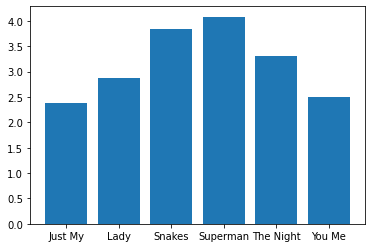

In [5]:
# 영화 별 평점
movie_rating = data.groupby('title').mean()
print(movie_rating)

plt.bar(movie_rating.index, movie_rating['rating'])

In [6]:
# 영화 시청 여부 교차표
c_tab = pd.crosstab(data['critic'], data['title'])
c_tab

title,Just My,Lady,Snakes,Superman,The Night,You Me
critic,,,,,,
Claudia,1,0,1,1,1,1
Gene,1,1,1,1,1,1
Jack,0,1,1,1,1,1
Lisa,1,1,1,1,1,1
Mick,1,1,1,1,1,1
Toby,0,0,1,1,0,1


In [7]:
rating_g = data.groupby(['critic', 'title']).sum()
rating_g

rating
critic  title            
Claudia Just My       3.0
        Snakes        3.5
        Superman      4.0
        The Night     4.5
        You Me        2.5
Gene    Just My       1.5
        Lady          3.0
        Snakes        3.5
        Superman      5.0
        The Night     3.0
        You Me        3.5
Jack    Lady          3.0
        Snakes        4.0
        Superman      5.0
        The Night     3.0
        You Me        3.5
Lisa    Just My       3.0
        Lady          2.5
        Snakes        3.5
        Superman      3.5
        The Night     3.0
        You Me        2.5
Mick    Just My       2.0
        Lady          3.0
        Snakes        4.0
        Superman      3.0
        The Night     3.0
        You Me        2.0
Toby    Snakes        4.5
        Superman      4.0
        You Me        1.0

In [8]:
# 행렬구조로 변환
tab = rating_g.unstack()
tab

rating                                      
title   Just My Lady Snakes Superman The Night You Me
critic                                               
Claudia     3.0  NaN    3.5      4.0       4.5    2.5
Gene        1.5  3.0    3.5      5.0       3.0    3.5
Jack        NaN  3.0    4.0      5.0       3.0    3.5
Lisa        3.0  2.5    3.5      3.5       3.0    2.5
Mick        2.0  3.0    4.0      3.0       3.0    2.0
Toby        NaN  NaN    4.5      4.0       NaN    1.0

In [9]:
reader = Reader(rating_scale=(1,5))
dataset = Dataset.load_from_df(df=data, reader=reader)
dataset

In [10]:
train = dataset.build_full_trainset()

In [11]:
test = train.build_testset()

In [12]:
model = SVD(n_factors=100, n_epochs=200, random_state=24)
model.fit(train)

In [13]:
user_id = 'Toby'
item_ids = ['The Night', 'Just My', 'Lady']
actual_rating = 0
est_rating = []

for item_id in item_ids :
    pred = model.predict(user_id, item_id, actual_rating)
    est_rating.append(pred.est)
    print(pred)

user: Toby       item: The Night  r_ui = 0.00   est = 2.91   {'was_impossible': False}
user: Toby       item: Just My    r_ui = 0.00   est = 2.79   {'was_impossible': False}
user: Toby       item: Lady       r_ui = 0.00   est = 2.86   {'was_impossible': False}


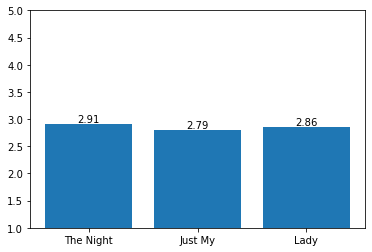

In [14]:
plt.bar(item_ids, est_rating)
plt.ylim([1, 5])
for i in range(len(est_rating)) :
    plt.text(item_ids[i], est_rating[i], round(est_rating[i], 2), ha='center', va='bottom')
plt.show()